In [1]:
# データセットを読み込むためにpandasをインポートする
import pandas as pd

# pandasのread_csvメソッドを用いてトレーニングデータを読み込む
train_data = pd.read_csv('./train.tsv', delimiter='\t')

In [2]:
train_data

,id,class,buying,maint,doors,persons,lug_boot,safety
0,0,unacc,low,med,3,2,small,low
1,3,acc,low,high,3,more,small,med
2,7,unacc,vhigh,high,5more,2,small,med
3,11,acc,high,high,3,more,big,med
4,12,unacc,high,high,3,2,med,high
...,...,...,...,...,...,...,...,...
859,1721,acc,high,high,5more,more,med,med
860,1722,unacc,high,high,5more,4,small,med
861,1724,unacc,high,low,3,more,med,low
862,1725,unacc,low,low,5more,2,small,med


In [3]:
# 各特徴量の変換用の辞書を設定する
buying_mapping = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
maint_mapping = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
doors_mapping = {'5more': 5, '4': 4, '3': 3, '2': 2}
persons_mapping = {'more': 6, '4': 4, '2': 2}
lug_boot_mapping = {'big': 3, 'med': 2, 'small': 1}
safety_mapping = {'high': 3, 'med': 2, 'low': 1}

# クラスラベル（class）の変換用の辞書を設定する
class_mapping = {'vgood': 4, 'good': 3, 'acc': 2, 'unacc': 1}

# トレーニングデータの各特徴量を変換する
train_data['buying'] = train_data['buying'].map(buying_mapping)
train_data['maint'] = train_data['maint'].map(maint_mapping)
train_data['doors'] = train_data['doors'].map(doors_mapping)
train_data['persons'] = train_data['persons'].map(persons_mapping)
train_data['lug_boot'] = train_data['lug_boot'].map(lug_boot_mapping)
train_data['safety'] = train_data['safety'].map(safety_mapping)

# トレーニングデータのクラスラベル（class）を変換する
train_data['class'] = train_data['class'].map(class_mapping)

# 変換後のトレーニングデータを表示
train_data

,id,class,buying,maint,doors,persons,lug_boot,safety
0,0,1,1,2,3,2,1,1
1,3,2,1,3,3,6,1,2
2,7,1,4,3,5,2,1,2
3,11,2,3,3,3,6,3,2
4,12,1,3,3,3,2,2,3
...,...,...,...,...,...,...,...,...
859,1721,2,3,3,5,6,2,2
860,1722,1,3,3,5,4,1,2
861,1724,1,3,1,3,6,2,1
862,1725,1,1,1,5,2,1,2


In [4]:
# pandasのilocメソッドを用いてトレーニングデータを特徴量（train_data_X）とクラスラベル（train_data_Y）に分離する
# idは学習に用いないため別に保管する
train_data_X = train_data.iloc[:,2:]
train_data_Y = train_data.iloc[:,1:2]
train_data_id = train_data.iloc[:,0:1]

In [5]:
train_data_X

,buying,maint,doors,persons,lug_boot,safety
0,1,2,3,2,1,1
1,1,3,3,6,1,2
2,4,3,5,2,1,2
3,3,3,3,6,3,2
4,3,3,3,2,2,3
...,...,...,...,...,...,...
859,3,3,5,6,2,2
860,3,3,5,4,1,2
861,3,1,3,6,2,1
862,1,1,5,2,1,2


In [6]:
train_data_Y

,class
0,1
1,2
2,1
3,2
4,1
...,...
859,2
860,1
861,1
862,1


In [7]:
type(train_data_Y)

pandas.core.frame.DataFrame

In [8]:
import matplotlib.pyplot as plt

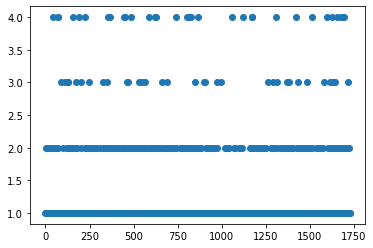

In [9]:
# トレーニングデータのクラスラベルの分布を調べる
plt.scatter(train_data_id, train_data_Y)

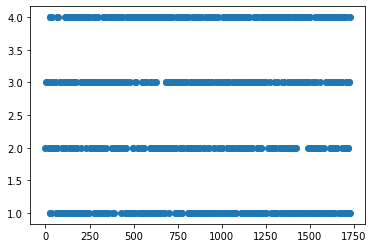

In [12]:
plt.scatter(train_data_id, train_data_X.iloc[:,1:2])

In [13]:
train_data_sorted = train_data.sort_values('class')

In [14]:
train_data_sorted

,id,class,buying,maint,doors,persons,lug_boot,safety
0,0,1,1,2,3,2,1,1
516,1037,1,3,3,2,6,3,1
517,1039,1,1,2,2,2,2,2
518,1040,1,3,1,4,6,3,1
519,1041,1,2,4,5,2,3,3
...,...,...,...,...,...,...,...,...
839,1683,4,2,2,2,6,3,3
558,1118,4,2,1,3,4,3,3
84,158,4,2,2,5,4,2,3
33,74,4,1,1,4,6,3,3


In [23]:
train_data_sorted.iloc[516]

id          707
class         1
buying        4
maint         2
doors         4
persons       6
lug_boot      1
safety        1
Name: 349, dtype: int64

In [19]:
num_class_1 = 0
num_class_2 = 0
num_class_3 = 0
num_class_4 = 0
for num in range(len(train_data_sorted)):
    df = train_data_sorted.iloc[num]
    if df['class'] == 1:
        num_class_1 += 1
    elif df['class'] == 2:
        num_class_2 += 1
    elif df['class'] == 3:
        num_class_3 += 1
    elif df['class'] == 4:
        num_class_4 += 1

print('num_class_1 = ' + str(num_class_1)
      + ', num_class_2 = ' + str(num_class_2)
      + ', num_class_3 = ' + str(num_class_3)
      + ', num_class_4 = ' + str(num_class_4))

# class_label = 1 : 0 - 590
# class_label = 2 : 591 - 796
# class_label = 3 : 797 - 830
# class_label = 4 : 831 - 863

num_class_1 = 591, num_class_2 = 206, num_class_3 = 34, num_class_4 = 33


In [20]:
train_data_sorted.iloc[590]

id          90
class        1
buying       4
maint        1
doors        4
persons      4
lug_boot     2
safety       1
Name: 39, dtype: int64

In [24]:
train_data_sorted.iloc[591]

id          237
class         2
buying        2
maint         3
doors         4
persons       6
lug_boot      3
safety        2
Name: 126, dtype: int64

In [26]:
train_data_sorted.iloc[796]

id          1196
class          2
buying         1
maint          1
doors          5
persons        6
lug_boot       1
safety         2
Name: 595, dtype: int64

In [27]:
train_data_sorted.iloc[797]

id          1645
class          3
buying         2
maint          1
doors          5
persons        6
lug_boot       2
safety         2
Name: 820, dtype: int64

In [28]:
train_data_sorted.iloc[830]

id          547
class         3
buying        2
maint         1
doors         5
persons       4
lug_boot      2
safety        2
Name: 269, dtype: int64

In [29]:
train_data_sorted.iloc[831]

id          222
class         4
buying        1
maint         1
doors         3
persons       4
lug_boot      3
safety        3
Name: 117, dtype: int64

In [32]:
train_data_sorted.iloc[864]

IndexError: single positional indexer is out-of-bounds

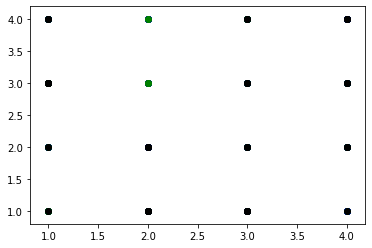

In [38]:
# class_label = 1 : 0 - 590
# class_label = 2 : 591 - 796
# class_label = 3 : 797 - 830
# class_label = 4 : 831 - 863
plt.scatter(train_data_X.iloc[0:591, 0], train_data_X.iloc[0:591, 1], color='red')
plt.scatter(train_data_X.iloc[591:797, 0], train_data_X.iloc[591:797, 1], color='blue')
plt.scatter(train_data_X.iloc[797:831, 0], train_data_X.iloc[797:831, 1], color='green')
plt.scatter(train_data_X.iloc[831:864, 0], train_data_X.iloc[831:864, 1], color='black')

plt.show()

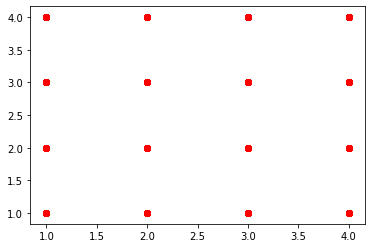

In [39]:
plt.scatter(train_data_X.iloc[0:591, 0], train_data_X.iloc[0:591, 1], color='red')

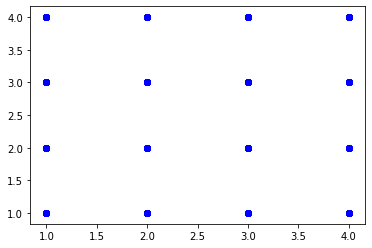

In [40]:
plt.scatter(train_data_X.iloc[591:797, 0], train_data_X.iloc[591:797, 1], color='blue')

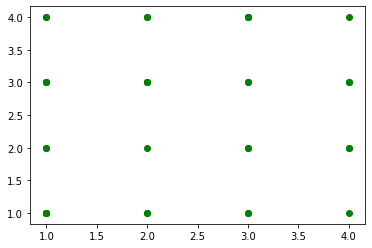

In [41]:
plt.scatter(train_data_X.iloc[797:831, 0], train_data_X.iloc[797:831, 1], color='green')

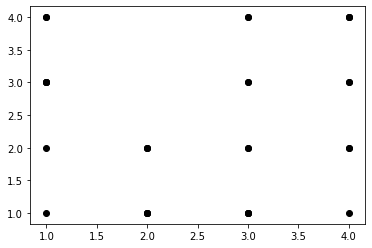

In [42]:
plt.scatter(train_data_X.iloc[831:864, 0], train_data_X.iloc[831:864, 1], color='black')

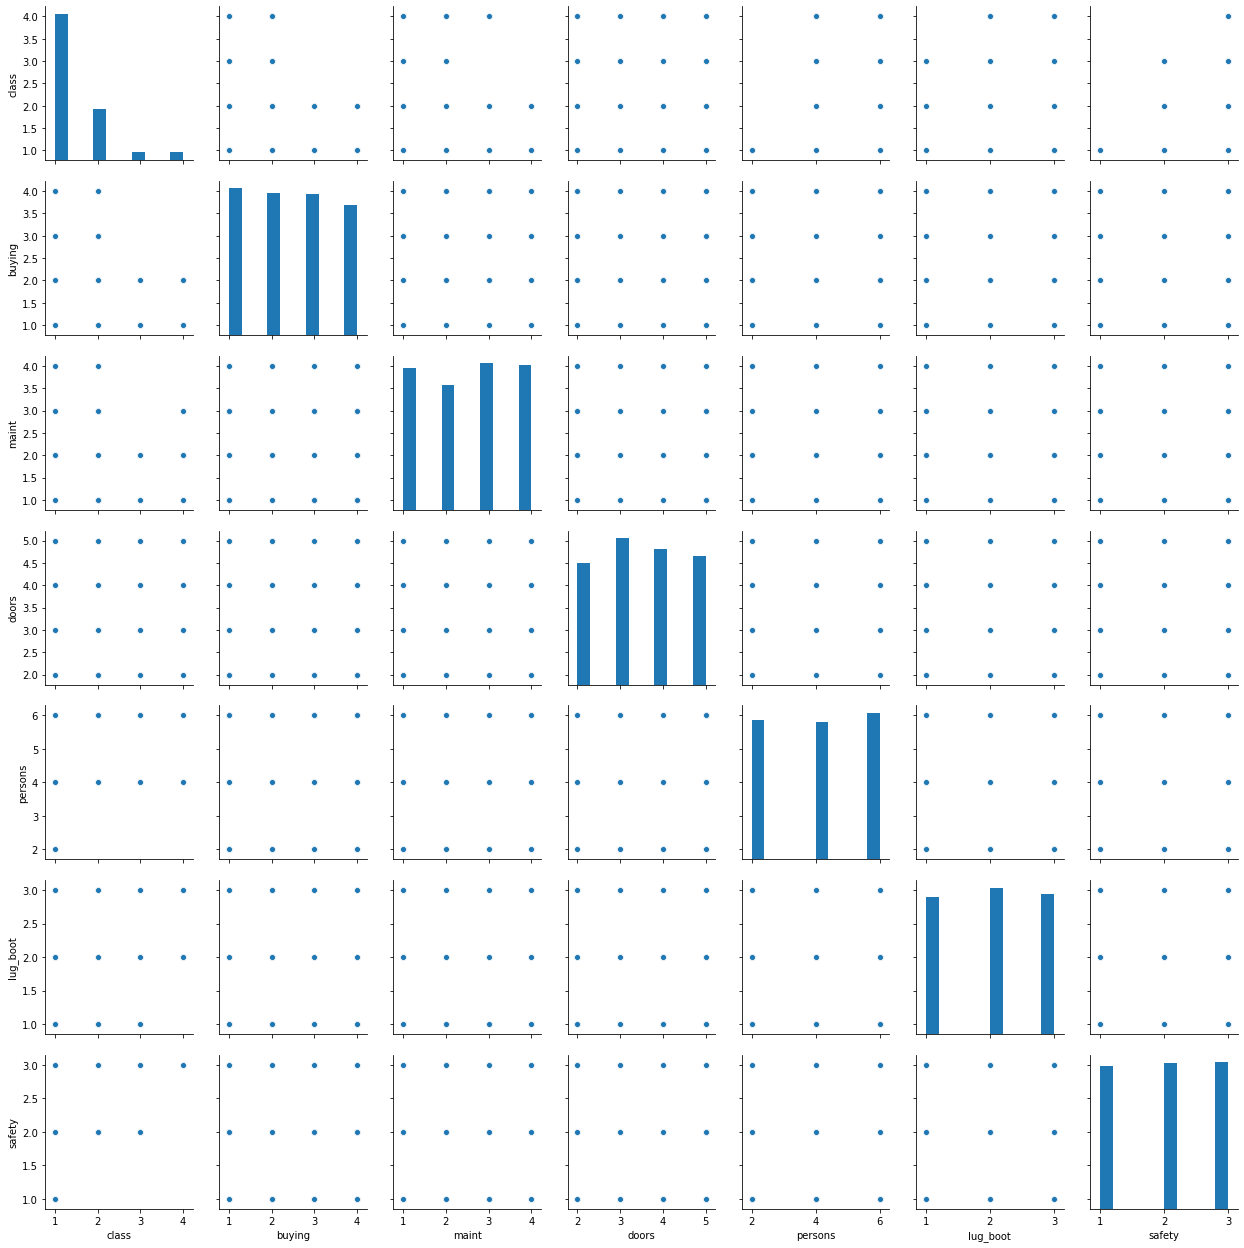

In [44]:
import seaborn as sns

sns.pairplot(pd.concat([train_data_Y, train_data_X], axis=1))

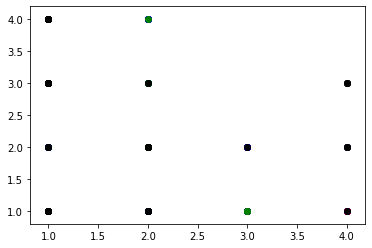

In [46]:
# class_label = 1 : 0 - 590
# class_label = 2 : 591 - 796
# class_label = 3 : 797 - 830
# class_label = 4 : 831 - 863
plt.scatter(train_data_Y.iloc[0:591, 0], train_data_X.iloc[0:591, 1], color='red')
plt.scatter(train_data_Y.iloc[591:797, 0], train_data_X.iloc[591:797, 1], color='blue')
plt.scatter(train_data_Y.iloc[797:831, 0], train_data_X.iloc[797:831, 1], color='green')
plt.scatter(train_data_Y.iloc[831:864, 0], train_data_X.iloc[831:864, 1], color='black')

plt.show()

Text(0, 0.5, 'class')

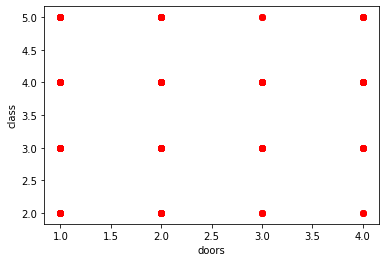

In [77]:
columnNum = 2

plt.scatter(train_data_Y.iloc[0:591, 0], train_data_X.iloc[0:591, columnNum], color='red')
plt.xlabel(train_data_X.columns[columnNum])
plt.ylabel(train_data_Y.columns[0])

Text(0, 0.5, 'class')

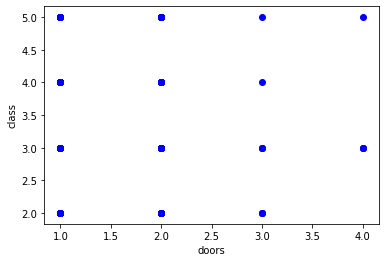

In [78]:
plt.scatter(train_data_Y.iloc[591:797, 0], train_data_X.iloc[591:797, columnNum], color='blue')
plt.xlabel(train_data_X.columns[columnNum])
plt.ylabel(train_data_Y.columns[0])

Text(0, 0.5, 'class')

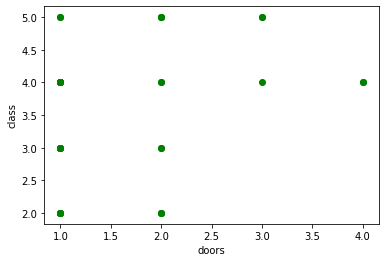

In [79]:
plt.scatter(train_data_Y.iloc[797:831, 0], train_data_X.iloc[797:831, columnNum], color='green')
plt.xlabel(train_data_X.columns[columnNum])
plt.ylabel(train_data_Y.columns[0])

Text(0, 0.5, 'class')

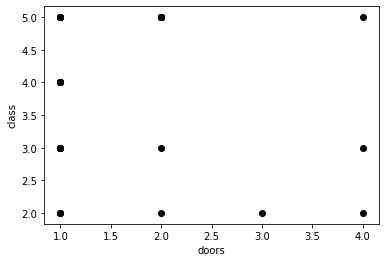

In [80]:
plt.scatter(train_data_Y.iloc[831:864, 0], train_data_X.iloc[831:864, columnNum], color='black')
plt.xlabel(train_data_X.columns[columnNum])
plt.ylabel(train_data_Y.columns[0])

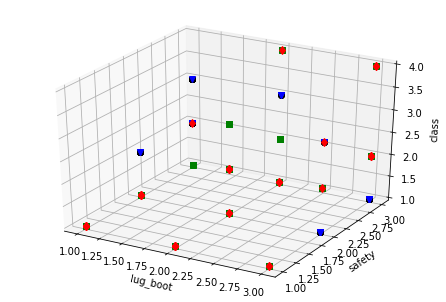

In [104]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

col_num_X = 4
col_num_Y = 5

ax.set_xlabel(train_data_X.columns[col_num_X])
ax.set_ylabel(train_data_X.columns[col_num_Y])
ax.set_zlabel(train_data_Y.columns[0])

ax.plot(train_data_X.iloc[0:591, col_num_X], 
        train_data_X.iloc[0:591, col_num_Y], 
        train_data_Y.iloc[0:591, 0], 
        color="black", marker="o", linestyle='None')

ax.plot(train_data_X.iloc[591:797, col_num_X], 
        train_data_X.iloc[591:797, col_num_Y], 
        train_data_Y.iloc[591:797, 0], 
        color="blue", marker="v", linestyle='None')

ax.plot(train_data_X.iloc[797:831, col_num_X], 
        train_data_X.iloc[797:831, col_num_Y], 
        train_data_Y.iloc[797:831, 0], 
        color="green", marker="s", linestyle='None')

ax.plot(train_data_X.iloc[831:864, col_num_X], 
        train_data_X.iloc[831:864, col_num_Y], 
        train_data_Y.iloc[831:864, 0], 
        color="red", marker="d", linestyle='None')

plt.show()